# Figure 2
this file is part of the V1 2Ch Predictive Code project

Author: Auguste Schulz  
1. Variable repetition experiment top traces different N reps bottom time constant of novelty rise
2. Sequence length experiment top traces with fit bottom linear fit to decay constants

In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

#reload(helper_functions)
from helper_functions import *

from evaluation_functions import *
import evaluation_functions

#reload(evaluation_functions)
from evaluation_functions import *
from helper.utils import return_colors,beautify_plot

In [2]:
figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

# Variable number of repetitions

/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


NON ADAPTIVE
[ 3  4  6  9 12 15 20 25 35 45]
../results/VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-06-41variablerepetitions_imprinting.h5/spiketime2020-03-31-02-02-23.h5
10
[ 8.45  9.35 11.15 13.85 16.55 19.25 23.75 28.25 37.25 46.25]
[106 117 140 174 207 241 297 354 466 579]
[ 3  4  6  9 12 15 20 25 35 45]
Repeated Sequences


/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spiki

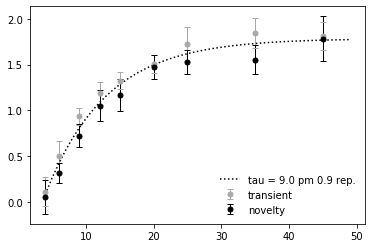

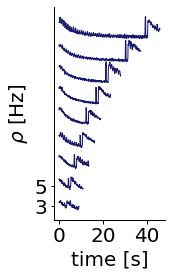

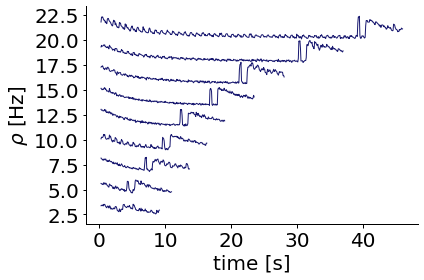

In [3]:
file_names = [
    "VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-06-41variablerepetitions_imprinting.h5",
    "VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-06-45variablerepetitions_imprinting.h5",
    "VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-06-50variablerepetitions_imprinting.h5",
    "VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-06-54variablerepetitions_imprinting.h5",
    "VarRepincrINHIB_0.1__dur907000.0msNblocks5Ntrain2lenstim300lenpause0Nimg3Nreps[3, 4, 6, 9, 12, 15, 20, 25, 35, 45]strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-30-23-07-00variablerepetitions_imprinting.h5"
]

# evaluate multiple files 
# average across 5 instances of the model

avgwindow = 4
Nreps, baseline_avg, height_novelty_avg, height_trans_post_avg = evaluate_multiple_variable_repetitions(file_names,avgwindow)

novelty = [ht-bl for ht,bl in zip(height_novelty_avg,baseline_avg)]
transient = [ht-bl for ht,bl in zip(height_trans_post_avg,baseline_avg)]

meannov = np.mean(novelty, axis = 0)
meantrans = np.mean(transient, axis = 0)
stdnov = np.std(novelty, axis = 0)
stdtrans = np.std(transient, axis = 0)
weight_increase = 0
ones = np.array([1]*weight_increase)
zeros = np.zeros_like(ones)
Nreps_both = np.concatenate((ones, Nreps[1:], Nreps[1:]))
peak_both = np.concatenate((zeros, meannov[1:], meantrans[1:]))

sigma = np.ones_like(Nreps_both)
sigma[0]=1
Nrepswithzero  = np.arange(1,50,1)

params_both, params_covariance_both = fit_traces_Nreps_2params(Nreps_both,peak_both, one_exp_no_offset, ifplot=False, sigma=sigma)
params_both_err = np.sqrt(np.diag(params_covariance_both))

params_both2, params_covariance_both2 = fit_traces_Nreps(Nreps_both,peak_both, one_exp_with_offset, ifplot=False, sigma=sigma)
params_both2_err = np.sqrt(np.diag(params_covariance_both2))


plt.figure()
plt.errorbar(Nreps[1:],meantrans[1:], yerr=stdtrans[1:], fmt='.', color = 'darkgrey',
        ecolor='darkgrey', elinewidth=1, capsize=3, label = 'transient', ms=10)
plt.errorbar(Nreps[1:],meannov[1:], yerr=stdnov[1:], fmt='.', color = 'k',
        ecolor='k', elinewidth=1, capsize=3, label = 'novelty', ms=10)
plt.plot(Nrepswithzero[3:50], one_exp_with_offset(Nrepswithzero[3:50], params_both2[0], params_both2[1], params_both2[2]),":" , color = "k",label = "tau = %.1f pm %.1f rep."%(params_both2[1], params_both2_err[1]))
plt.legend(frameon = False)


timestr = time.strftime("%Y-%m-%d-%H-%M-%S")
edges_0, mean_hist_E_0, Nreps_0, endindices_0 = run_variable_repetitions_short(file_names[0], avgwindow = avgwindow, timestr=timestr)

fig = plt.figure()

offset = 2.3
startidx = 3
for seq in range(1,len(Nreps_0)+1):
    plot_popavg_mult(fig,  edges_0[seq-1][startidx:endindices_0[seq-1]],mean_hist_E_0[seq-1][startidx:endindices_0[seq-1]] + offset*(seq-1),
                                 iflegend = False, legend = "Nreps: " + str(Nreps[seq-1]),
                                 lw = 1, ifcolor = True, color = "midnightblue")

# Sequence length

/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


NON ADAPTIVE
../results/SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-39-39sequencelength_imprintingwithNovelty.h5/spiketime2020-03-23-12-46-50.h5
5
12
23
34
46
57


/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spiki

SEQLEN ON
novelty
novelty
novelty
novelty
novelty
SEQLEN ON
iftransientpre
iftransientpre
iftransientpre
iftransientpre
iftransientpre


/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spikingneuralnet/v1novelty/spiking/paper-figures/helper_functions.py:191: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(111)
/home/auguste/Documents/paper_v1novelty/code/spiki

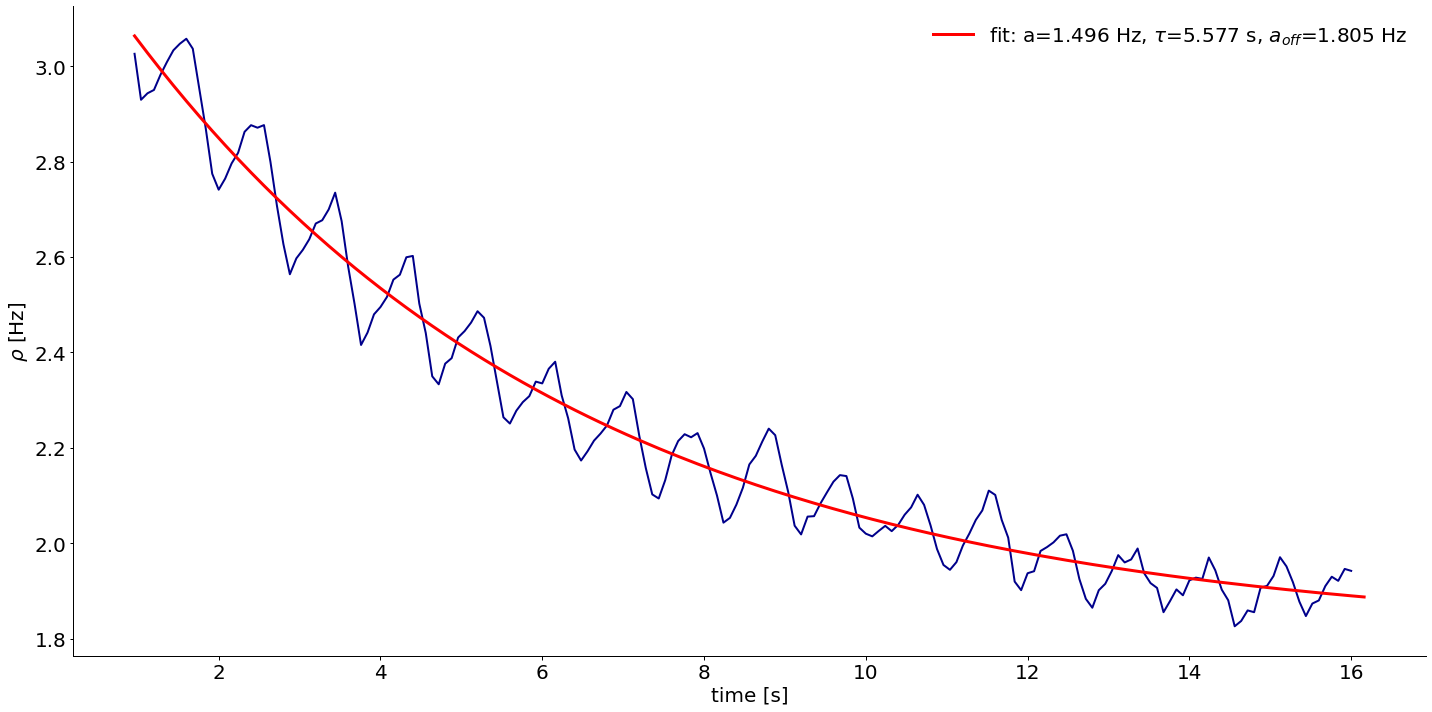

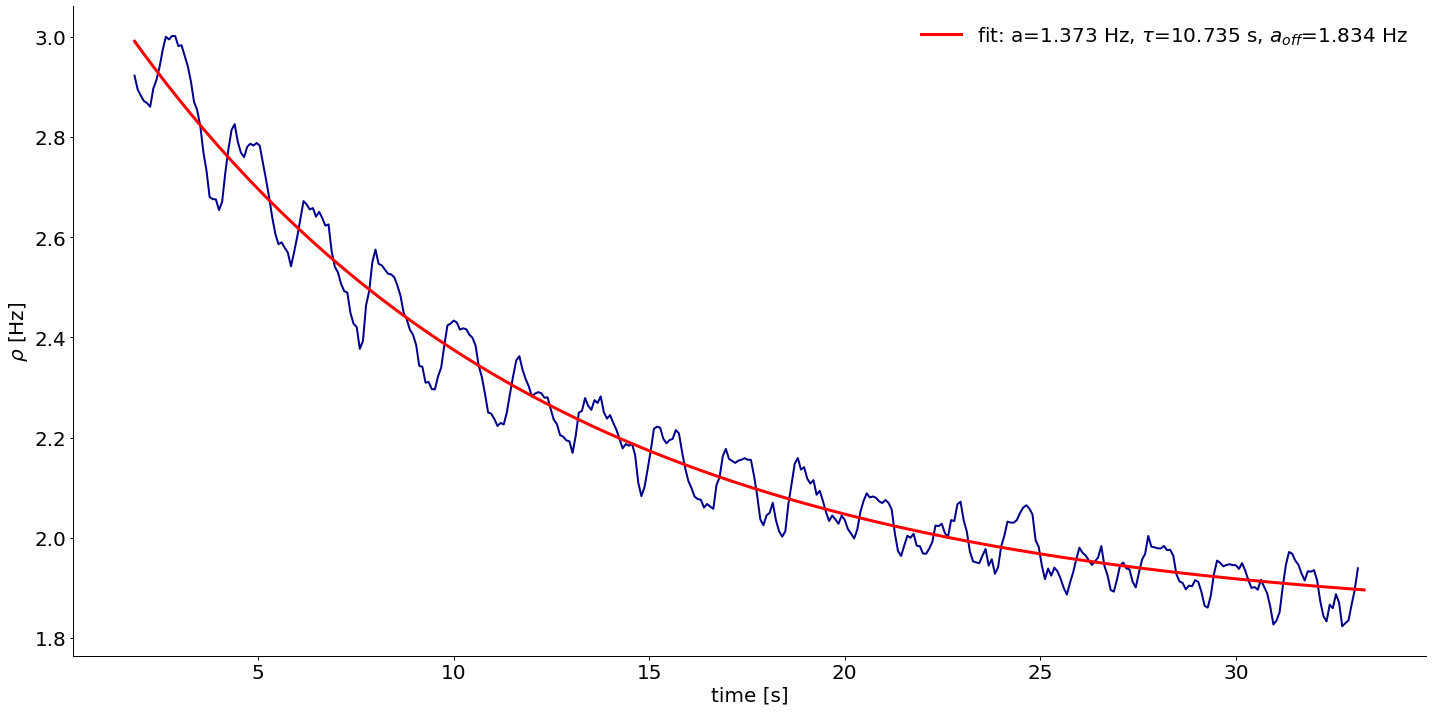

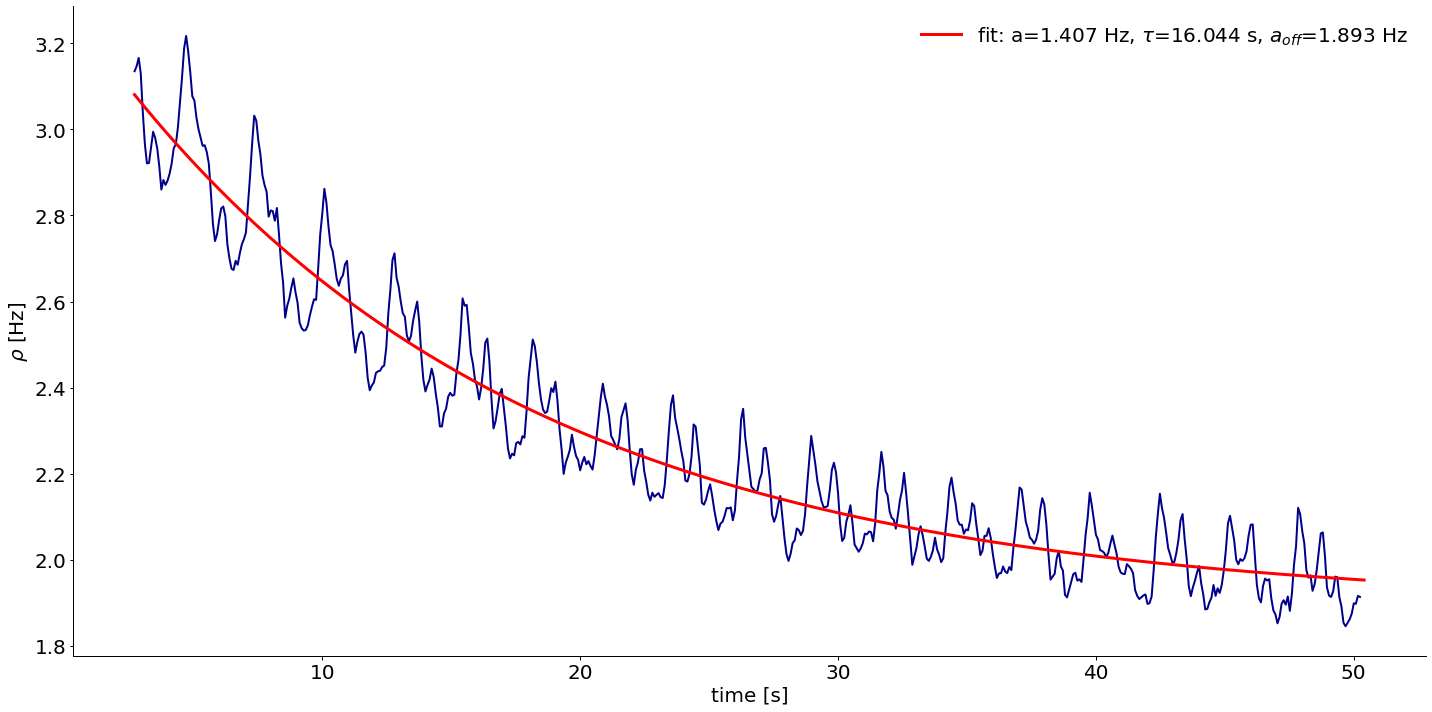

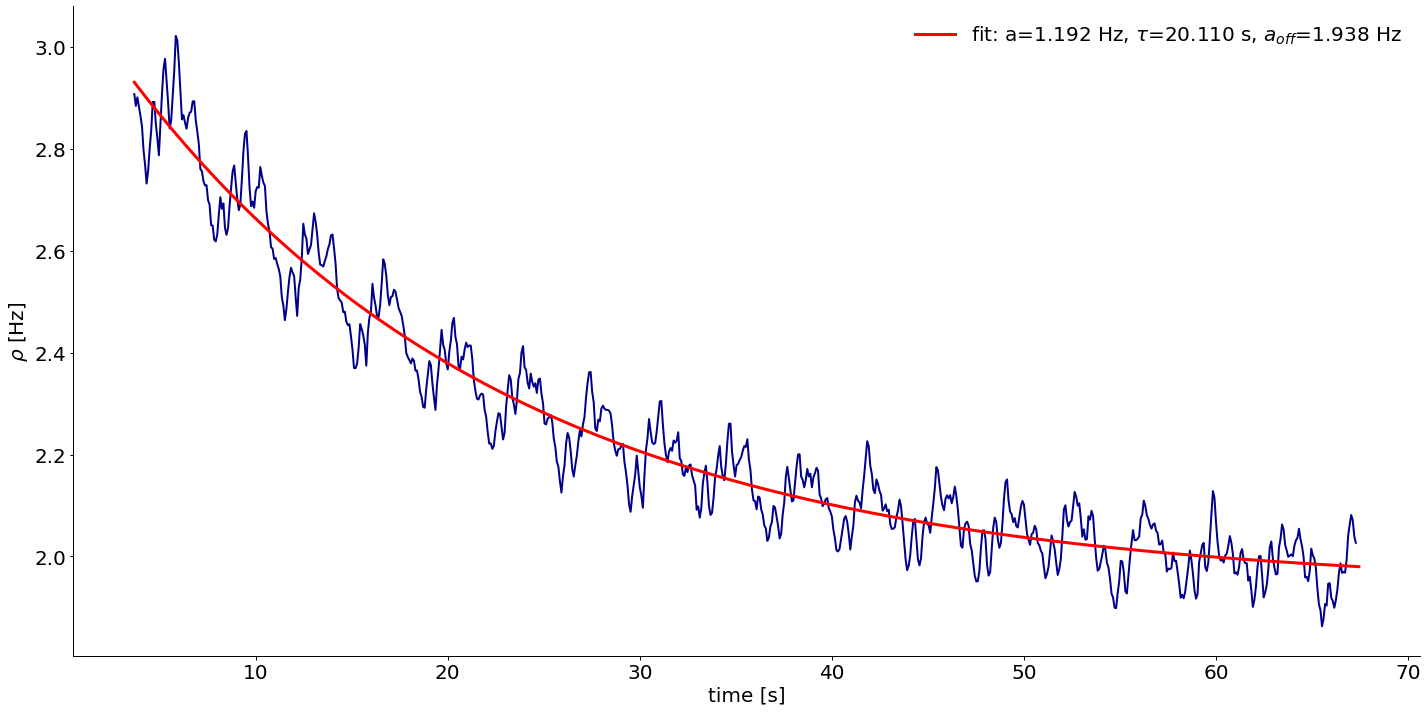

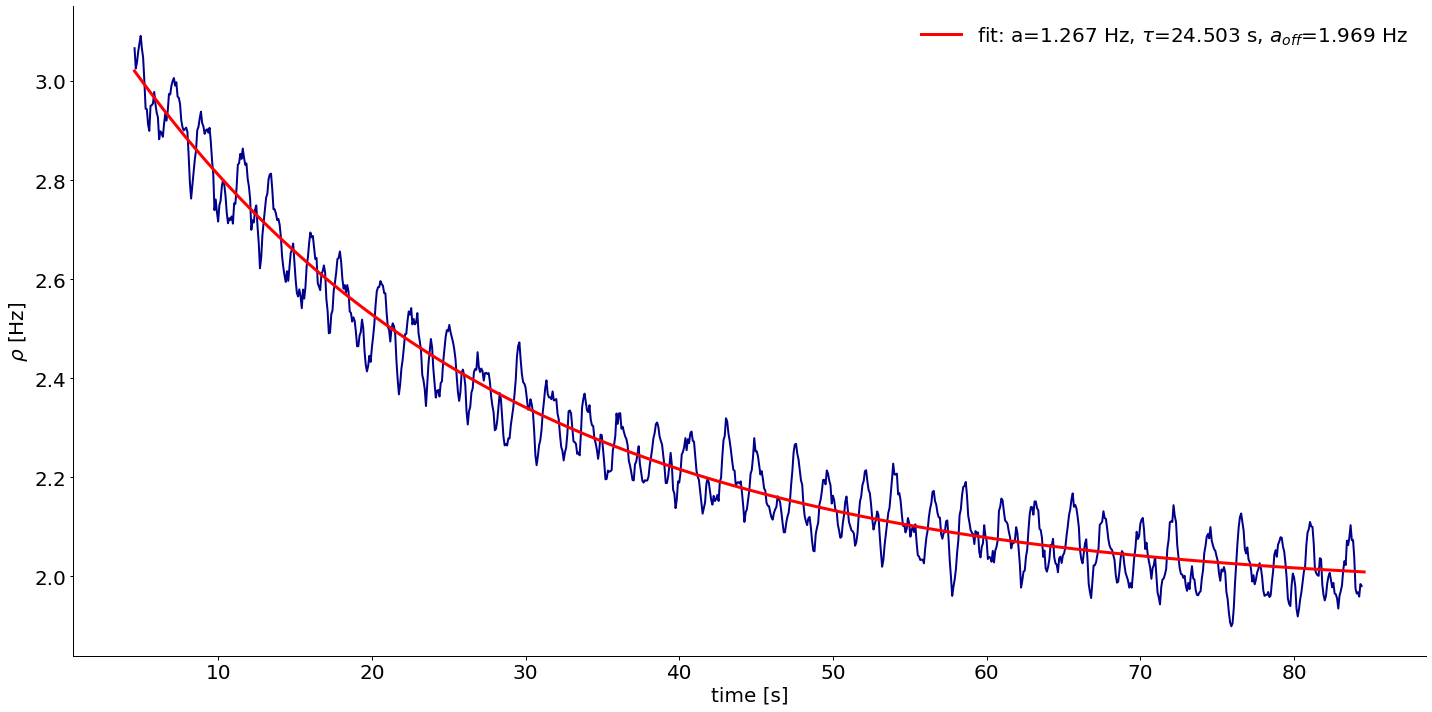

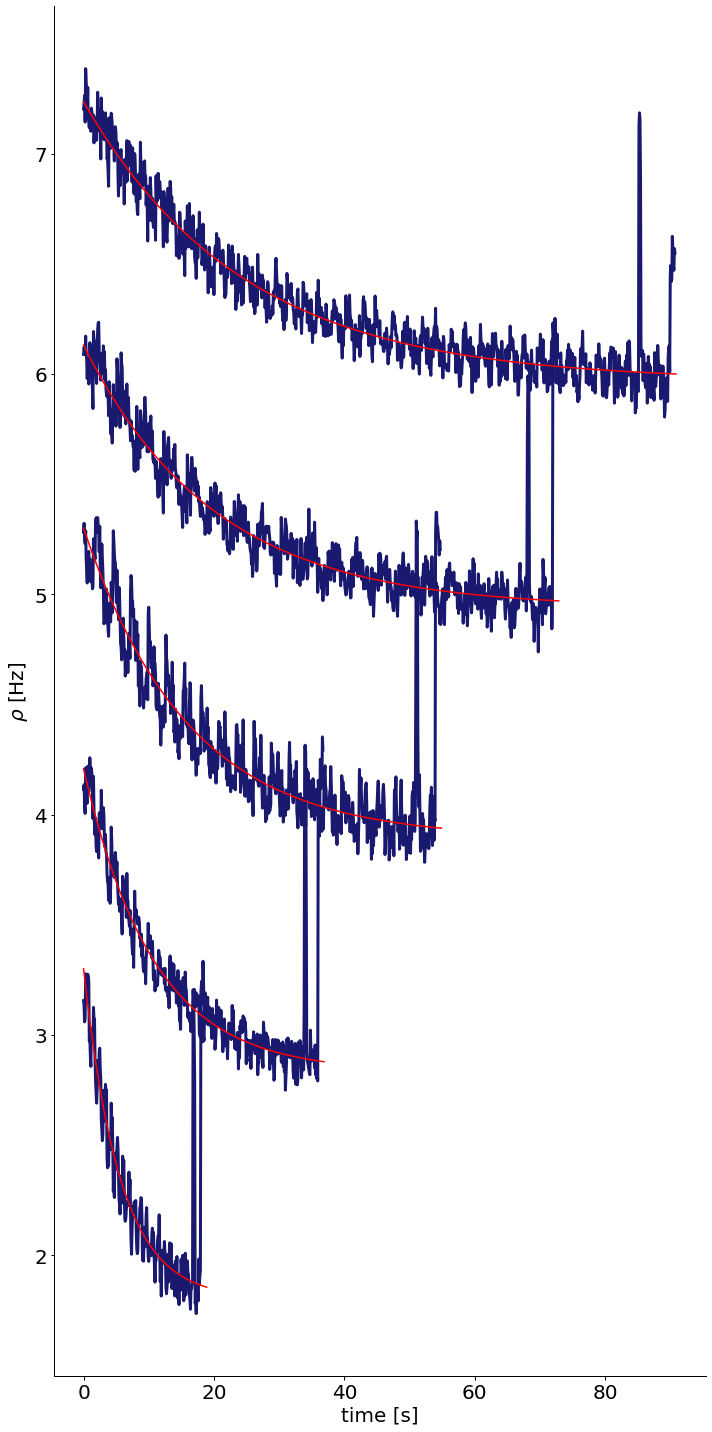

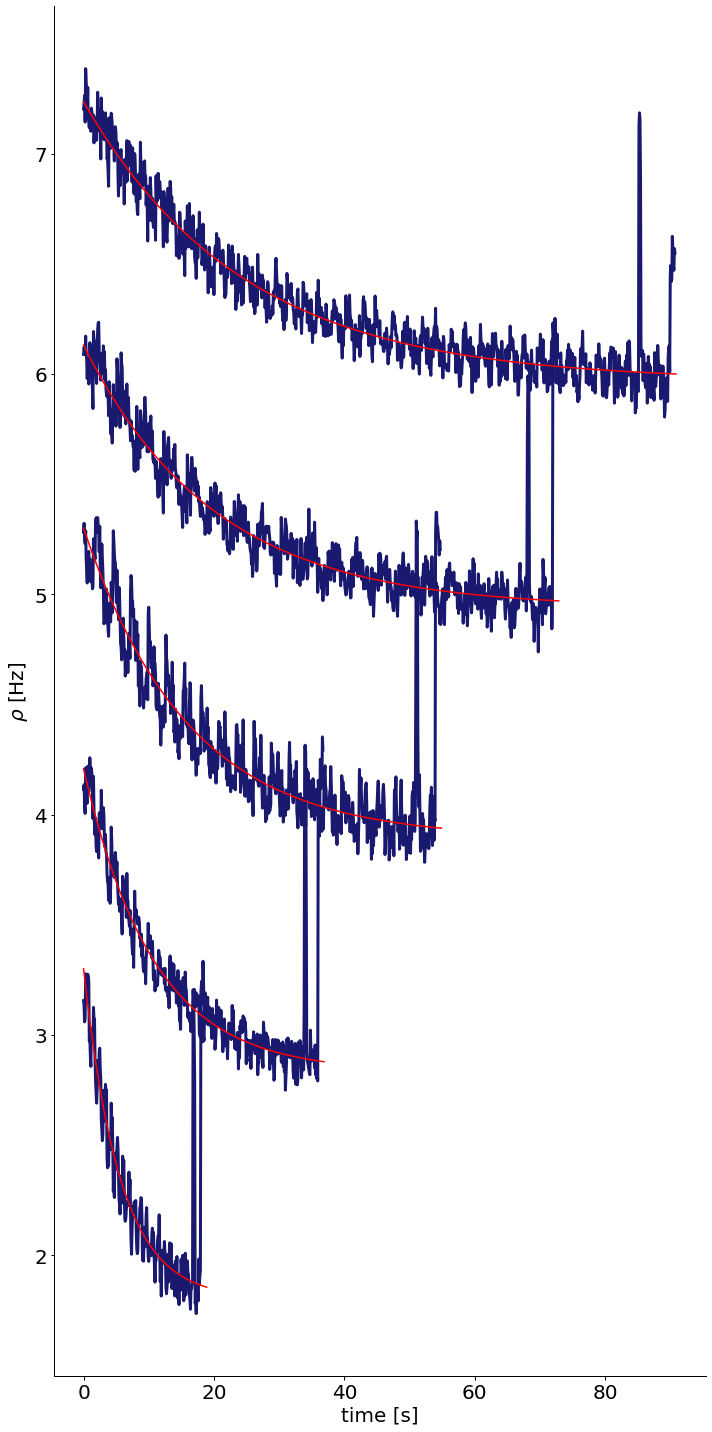

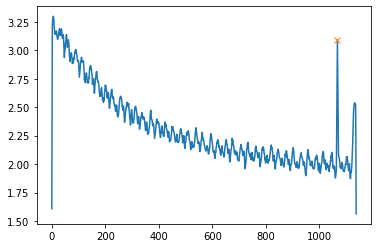

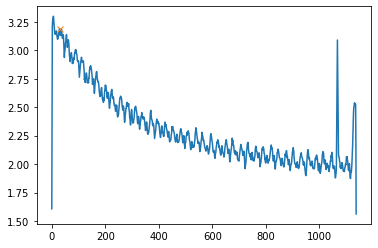

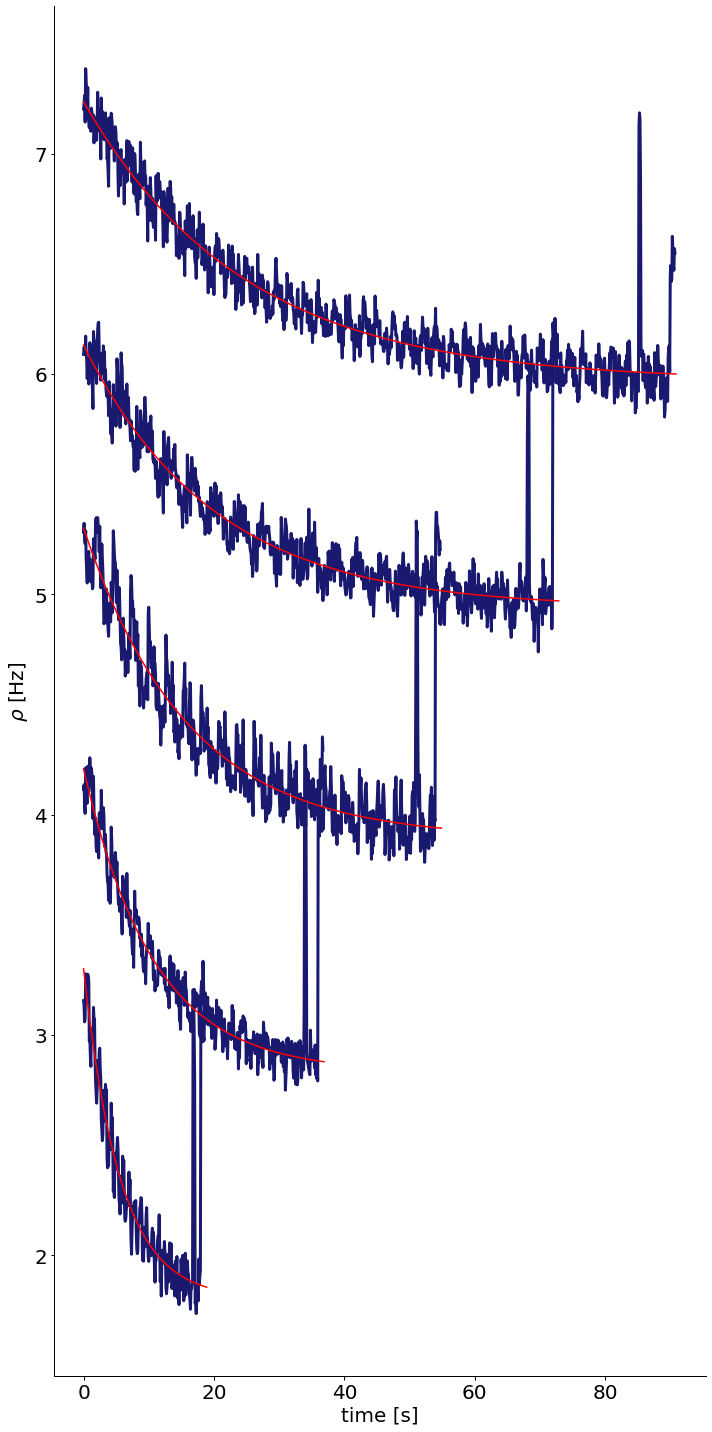

In [4]:
color = ["midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon", "midnightblue","darkred","darkgreen","darkmagenta","darkorange","darkcyan", "brown", "slategrey", "darksalmon","grey", "green", "salmon"]
colorI = ["darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred","darkred"]

file_names = [
    "SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-39-39sequencelength_imprintingwithNovelty.h5",
    "SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-41-16sequencelength_imprintingwithNovelty.h5",
    "SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-41-18sequencelength_imprintingwithNovelty.h5",
    "SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-41-30sequencelength_imprintingwithNovelty.h5",
    "SeqLenincrINHIB_0.1_FINALdur1.594e6msNblocks5Ntrain2lenstim300lenpause0Nimg[3, 6, 9, 12, 15]Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-03-23-00-41-32sequencelength_imprintingwithNovelty.h5",
]
avgwindow = 4
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")

edges_seqlen, mean_hist_E_seqlen, Nimg_seqlen, params_blockavg_seqlen = sequence_length_single(file_names[0], avgwindow = avgwindow, timestr=timestr)


plot_all_averages_with_fits(edges_seqlen, mean_hist_E_seqlen, Nimg_seqlen, params_blockavg_seqlen, savehandle = "E_withfits", ifseqlen=True, figure_directory = './', color = color, ifoffset=True, iflegend=False, ifyticks=False)


5.0
20.0
5.0
['Avgwindow4', 'avgwindow4', 'edges_window4', 'mean_hist_E_boxcar_window4', 'mean_hist_E_nomem_window4', 'mean_hist_E_nomemnonov_window4', 'mean_hist_E_window4', 'mean_hist_I_window4']
True
5.0
20.0
5.0
['Avgwindow4', 'avgwindow4', 'edges_window4', 'mean_hist_E_boxcar_window4', 'mean_hist_E_nomem_window4', 'mean_hist_E_nomemnonov_window4', 'mean_hist_E_window4', 'mean_hist_I_window4']
True
5.0
20.0
5.0
['Avgwindow4', 'avgwindow4', 'edges_window4', 'mean_hist_E_boxcar_window4', 'mean_hist_E_nomem_window4', 'mean_hist_E_nomemnonov_window4', 'mean_hist_E_window4', 'mean_hist_I_window4']
True
5.0
20.0
5.0
['Avgwindow4', 'avgwindow4', 'edges_window4', 'mean_hist_E_boxcar_window4', 'mean_hist_E_nomem_window4', 'mean_hist_E_nomemnonov_window4', 'mean_hist_E_window4', 'mean_hist_I_window4']
True
5.0
20.0
5.0
['Avgwindow4', 'avgwindow4', 'edges_window4', 'mean_hist_E_boxcar_window4', 'mean_hist_E_nomem_window4', 'mean_hist_E_nomemnonov_window4', 'mean_hist_E_window4', 'mean_hist_I_

/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


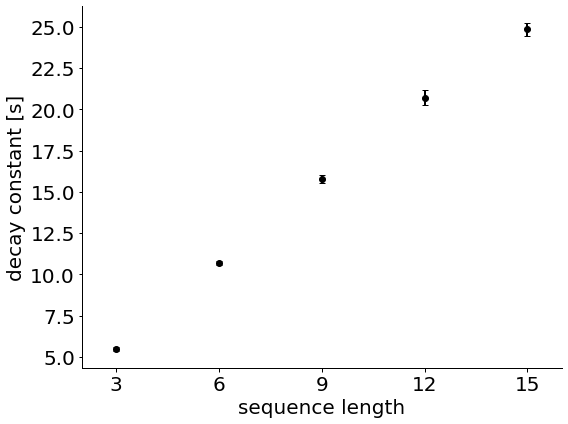

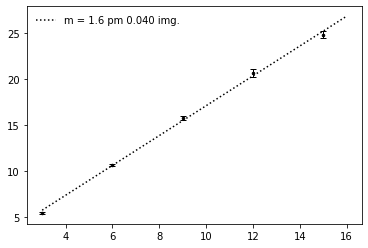

In [5]:
avgwindow = 4
Nimg_plot, tau_transientpre_avg = evaluate_multiple_sequence_length_short(file_names,avgwindow)
plot_Nreps_array_comparison_errorbar(Nimg_plot, tau_transientpre_avg, figsize=(8, 6), xtickstepsize = 1, fontsize = 20,Nfiles = len(file_names), c3 = "k", ifxlims = True, ylabel ="decay constant [s]", xlabel="sequence length", figure_directory = './', ifsavefig = False, savename="All_Tau_transientpre_avg_errorbar")

meantau = np.mean(tau_transientpre_avg,axis=0)
stdtau = np.std(tau_transientpre_avg,axis=0)

def lin_with_offset(x, m, yo):
    """ return line with slope m and offset yo"""
    return m * x + yo

params_bl, params_covariance_bl = fit_traces_Nreps_2params(Nimg_plot, meantau, lin_with_offset, ifplot=False)
params_bl_err = np.sqrt(np.diag(params_covariance_bl))
x_fit = np.arange(3,17,1)
plt.figure()
plt.errorbar(Nimg_plot,meantau, yerr=stdtau, fmt='.', color = 'k',
        ecolor='k', elinewidth=1, capsize=3, ms=5)

plt.plot(x_fit, lin_with_offset(x_fit, params_bl[0], params_bl[1]), ":" , color = "k",label = "m = %.1f pm %.3f img."%(params_bl[0], params_bl_err[0]))
plt.legend(frameon=False)

In [6]:
def barplot_peak_comparison_ax(ax, noveltyE, noveltyI, transientE, transientI, baselineE, baselineI, ifxlims = False, figure_directory = "./",
 figsize=(7, 5), xlims = [0,45], alpha = 0.8, legend = "E", ifxticks = True, xtickstepsize = 3,
  iflegend = False, c1 = "grey",c3 = "midnightblue", c2 = "darkred",lw = 3,fontsize = 24,
   xlabel = "number of repetitions", ylabel ="rate [Hz]",
    ifioff = True, ifsavefig = True, savename = "ComparisonPeakHeightsBarPlot", axiswidth = 1):
        """ plot Narrays vs. array (Nreps,Nblocks) array_blockavg (Nreps)"""
        

        ax.bar(1, np.mean(baselineE),color = c3, edgecolor=c3, yerr = np.std(baselineE), align='center', alpha=alpha)
        ax.bar(4, np.mean(noveltyE),color = c3, edgecolor=c3, yerr = np.std(noveltyE), align='center', alpha=alpha)
        ax.bar(7, np.mean(transientE),color = c3, edgecolor=c3, yerr = np.std(transientE), label = "E",align='center', alpha=alpha)

        ax.bar(2, np.mean(baselineI),color = c2, edgecolor=c2, yerr = np.std(baselineI), label = "I",align='center', alpha=alpha)
        ax.bar(5, np.mean(noveltyI),color = c2, edgecolor=c2, yerr = np.std(noveltyI), align='center', alpha=alpha)
        ax.bar(8, np.mean(transientI),color = c2, edgecolor=c2, yerr = np.std(transientI), align='center', alpha=alpha)


        #plt.fill_between(Nreps, meanarr-stdarr, meanarr+stdarr, alpha=alpha, edgecolor=c3, facecolor=c3)

        
        if iflegend:
            ax.legend(frameon = False)
            

def plot_popavg_ax(fig,time, data, legend = "E", iflegend = False, color = "blue", ifcolor = False, lw = 3,fontsize = 20, xlabel = "time [s]", ylabel ="$\\rho$ [Hz]", ifioff = True, axiswidth = 1, ncol = 1, alpha = 1):
        """ plot population average in one figure fig (def before)"""
        #fig = plt.figure(figsize=(20, 10)) #run first and then conse
        if ifioff:
            plt.ioff()

        ax = fig
    
        if iflegend:
            if ifcolor:
                ax.plot(time[0:-2], data[0:-2], label = legend, color = color, lw = lw, alpha = alpha)
                
            else:
                ax.plot(time[0:-2], data[0:-2], label = legend, lw = lw, alpha = alpha)
                
        else:
            if ifcolor:
                ax.plot(time[0:-2], data[0:-2], color = color, lw = lw, alpha = alpha)
            else:
                ax.plot(time[0:-2], data[0:-2], lw = lw, alpha = alpha)
                
                

def averages_with_fits_ax(ax, timelist, datalist, Nreps,  params_blockavg, startidx = 0, endidx = -1, figure_directory = "./", figsize=(10, 20), ifoffset = True,
                              offset = 1, ifseqlen = False, iflegend = False, ifcolor = True, color = ["r","g","b","k","c","m","r","g","b","k","c","m"],
                            fontsize = 20, lw = 1, xlabel = "time [s]", legendhandle = "Nimg: ", Nreponset = 6, ylabel ="$\\rho$ [Hz]",
                              ifioff = False, ifyticks = True, yticks = [3,4], ifsavefig = True, savehandle = "E", axiswidth = 1):
    """ plot population averages in one figure
    input:  list with means
            time vector
            number of repetitions vector"""
    if ifseqlen:
        for seq in range(1,len(Nreps) + 1):
            if ifoffset:
                # plot_popavg_mult(fig,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx] + offset*(seq-1),
                #                  iflegend = iflegend, legend = legendhandle + str(Nreps[seq-1]),
                #                  lw = lw, ifcolor = ifcolor, color = color[seq-1])
                plot_popavg_ax(ax,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx] + offset*(seq-1),
                                 iflegend = iflegend, legend = legendhandle + str(Nreps[seq-1]),
                                 lw = lw, ifcolor = ifcolor, color = "midnightblue")
                ax.plot(timelist[seq-1][startidx:endidx], exp_with_offset(timelist[seq-1][startidx:endidx], params_blockavg[seq-1,0], params_blockavg[seq-1,1],params_blockavg[seq-1,2])+ offset*(seq-1), color = "red")
            else:
                # plot_popavg_mult(fig,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx],
                #                      iflegend = iflegend, legend = legendhandle + str(Nreps[seq-1]),
                #                      lw = lw, ifcolor = ifcolor, color = color[seq-1])
                plot_popavg_ax(ax,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx],
                                     iflegend = iflegend, legend = legendhandle + str(Nreps[seq-1]),
                                     lw = lw, ifcolor = ifcolor, color = "midnightblue")
                ax.plot(timelist[seq-1][startidx:endidx], exp_with_offset(timelist[seq-1][startidx:endidx], params_blockavg[seq-1,0], params_blockavg[seq-1,1],params_blockavg[seq-1,2])+ offset*(seq-1), color = "red")

    else:
        for seq in reversed(range(Nreponset,len(Nreps) + 1)):
            if ifoffset:
                plot_popavg_ax(ax,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx] + offset*(seq-1),
                                 iflegend = iflegend, legend = "Nreps: " + str(Nreps[seq-1]),
                                 lw = lw, ifcolor = ifcolor, color = color[seq-1])
            else:
                plot_popavg_ax(ax,  timelist[seq-1][startidx:endidx],datalist[seq-1][startidx:endidx],
                                     iflegend = iflegend, legend = "Nreps: " + str(Nreps[seq-1]),
                                     lw = lw, ifcolor = ifcolor, color = color[seq-1])

exp fit : tau = 9.0 \pm 0.9 rep.
lin fit : m = 1.6 
pm 0.04 img.


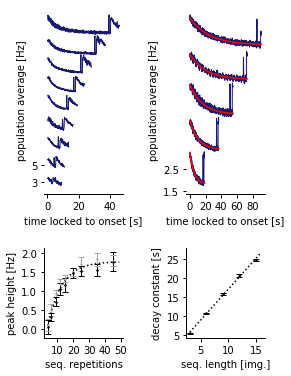

In [10]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels`b
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


axiswidth=1
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
figsize_cm = (10,13)
figsize_inch = cm2inch(figsize_cm)
figsize_inch
fig2 = plt.figure(constrained_layout=True, figsize=figsize_inch)
gs = fig2.add_gridspec(32, 10, hspace=0.5)


f2_ax4 = fig2.add_subplot(gs[0:21, :5])

f2_ax5 = fig2.add_subplot(gs[22:, :5])

f2_ax6 = fig2.add_subplot(gs[0:21, 5:])

f2_ax7 = fig2.add_subplot(gs[22:, 5:])

#plt.setp(f2_ax1.get_xticklabels(), visible=False)

for aa, ax in enumerate([f2_ax4,f2_ax5,f2_ax6,f2_ax7]):
    for axis in ['bottom', 'left']:
            ax.spines[axis].set_linewidth(axiswidth)
    for axis in ['top', 'right']:
        ax.spines[axis].set_linewidth(0)
    ax.xaxis.set_tick_params(width=axiswidth)
    ax.yaxis.set_tick_params(width=axiswidth)
    ax.locator_params(tight=True, nbins=5)
#save_fig(FIG_DIR, "Figure_template")
#plt.locator_params(axis='both', nbins=3)

# ===============================================0 begin plotting ===============================================
Nseq = 5
Nimg = 3
color = ["midnightblue","lightskyblue","royalblue","darkred","darksalmon", "saddlebrown","darkgreen","greenyellow","darkolivegreen","darkmagenta","thistle","indigo","darkorange","tan","sienna", "black", "silver","dimgrey", "fuchsia", "orchid","plum",  "lightseagreen", "lightcyan", "darkslategray",  "goldenrod","gold", "wheat","forestgreen", "aquamarine", "palegreen"]
colormain = color[0:Nimg*Nseq:Nimg]
colormain
cutoff = 1


# ================================================ variable repetition =================================================

offset = 2.3
startidx = 3
for seq, trace in enumerate(mean_hist_E_0):#ange(2,len(Nreps_0)+2):
    plot_popavg_ax(f2_ax4,  edges_0[seq][startidx:endindices_0[seq]],trace[startidx:endindices_0[seq]] + offset*(seq),
                                 iflegend = False, legend = "Nreps: " + str(Nreps_0[seq]),
                                 lw = 1, ifcolor = True, color = "midnightblue")
f2_ax4.set(ylabel ="population average [Hz]", xlabel = "time locked to onset [s]")
f2_ax4.set(yticks = [3,5])
f2_ax4.spines['left'].set_linewidth(0)
f2_ax4.plot([],[],color="midnightblue",label= "4 to 45 reps.")
#f2_ax4.legend(frameon = False)


f2_ax5.errorbar(Nreps[1:],meantrans[1:], yerr=stdtrans[1:], fmt='.', color = 'darkgrey',
        ecolor='darkgrey', elinewidth=1, capsize=3, label = 'transient', ms=3)
f2_ax5.errorbar(Nreps[1:],meannov[1:], yerr=stdnov[1:], fmt='.', color = 'k',
        ecolor='k', elinewidth=1, capsize=3, label = 'novelty', ms=3)
f2_ax5.plot(Nrepswithzero[3:50], one_exp_with_offset(Nrepswithzero[3:50], params_both2[0], params_both2[1], params_both2[2]),
            ":" , color = "k",label = "tau = %.1f \pm %.1f rep."%(params_both2[1], params_both2_err[1]))
#f2_ax5.legend(frameon = False)
f2_ax5.set(ylabel ="peak height [Hz]", xlabel ="seq. repetitions")
label = "tau = %.1f \pm %.1f rep."%(params_both2[1], params_both2_err[1])
print('exp fit :', label)


# ================================================ sequence length =================================================



averages_with_fits_ax(f2_ax6, edges_seqlen, mean_hist_E_seqlen, Nimg_seqlen, params_blockavg_seqlen,
                      savehandle = "E_withfits", ifseqlen=True, figure_directory = './figures/', color = color, ifoffset=True,
                      iflegend=False, ifyticks=False, offset = 1.6)
f2_ax6.spines['left'].set_linewidth(0)
f2_ax6.set(yticks = [1.5,2.5])
f2_ax6.plot([],[],color="midnightblue",label= "3 to 15 img.")
f2_ax6.set(ylabel ="population average [Hz]", xlabel = "time locked to onset [s]")

f2_ax7.errorbar(Nimg_plot,meantau, yerr=stdtau, fmt='.', color = 'k',
        ecolor='k', elinewidth=1, capsize=3, ms=3)

f2_ax7.plot(x_fit, lin_with_offset(x_fit, params_bl[0], params_bl[1]), ":" , color = "k",label = "m = %.1f \npm %.2f img."%(params_bl[0], params_bl_err[0]))
#f2_ax7.legend(frameon=False)
f2_ax7.set(ylabel ="decay constant [s]", xlabel ="seq. length [img.]")
label = "m = %.1f \npm %.2f img."%(params_bl[0], params_bl_err[0])
print('lin fit :', label)
save_fig("./figures/","Figure_2_Just_Var_Rep_Seq_Len")